# Lab 2 - Elementary Music Synthesis and Convolution

Team Members: Logan Aikas, Victor Li, Kate Sullivan

In [81]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as time_import
from IPython import display
import simpleaudio as sa
import math

# 1) Music Synthesis

In this section you will be generating some tones and combining them in ways that make them better perceptible.

In [82]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

SINGLE_COUNT = 0.25


# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)


#quarter note
n_q = np.arange(0, SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)

#half note
n_h = np.arange(0, 2*SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)

#whole note
n_w = np.arange(0, 4*SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)


A_Note = np.sin(2*np.pi*A*n_w)
B_Note = np.sin(2*np.pi*B*n_h)
C_Note = np.sin(2*np.pi*C*n_q)
E_Note = np.sin(2*np.pi*E*n_w)

sa.play_buffer((A_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((B_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((C_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((E_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()


In [83]:
def play(notes, concatenated_flag, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    
    
    score = np.asarray([])
    
    if not concatenated_flag:
        score = np.concatenate(notes)
    else:
        score = notes
    
    sa.play_buffer((score * 32767).astype('int16'), DEFAULT_NUM_CHANNELS, DEFAULT_BYTES_PER_SAMPLE, DEFAULT_SAMPLE_RATE).wait_done()
   
    # TO DO: finish the play function to play the contents of "data"

def display_envelope(signal,duration=-1,sample_rate=DEFAULT_SAMPLE_RATE,bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    
    from scipy.signal import hilbert
    
    if duration < 0:
        duration = len(signal)/sample_rate
    
    n = int(duration*sample_rate)
    
    analytic_signal = hilbert(signal[0:n])
    amplitude_envelope = np.abs(analytic_signal)
        
    t = np.linspace(0,duration,len(amplitude_envelope))
    
    plt.figure()    
    plt.plot(t,amplitude_envelope)
    plt.show()

In [84]:
# defining note function 

def note(frequency, note_type, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    
    Note = np.sin(2*np.pi*frequency*note_type)
    
    return Note
 
#the Scarborough Fair Score
SF_score = [note(A, n_h), note(A, n_q), note(E, n_q), note(E, n_q), note(E, n_q), note(B, n_q), note(C, n_q), note(B, n_q), note(A, n_w)]

play(SF_score, False)


In [85]:


def Scarborough_Fair():
    
    play(SF_score, False)
    
        
    
Scarborough_Fair()
    


## Volume Variations

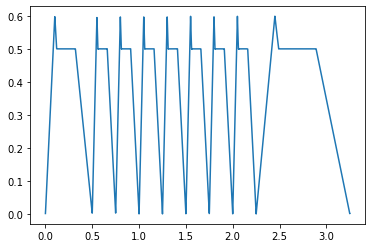

In [86]:
# Volume Variation Function Attack, Decay, Sustain and Release (ADSR)
def adsr(input_note):
    
    
    note_length = len(input_note)
    
    
    
    attack_length = round(note_length*0.2)
    
    decay_length = round(note_length*0.04)
    
    sustain_length = round(note_length*0.4)
    
    release_length = round(note_length*0.36)

    n_attack = np.arange(0, attack_length, 1)
    
    attack_equation = (0.6/attack_length)*n_attack
    
    
    
    
    n_decay = np.arange(0, decay_length, 1)
    
    decay_equation = 0.6 - (0.1/decay_length)*n_decay
    
    sustain_equation = np.ones(sustain_length)*0.5
    
    n_release = np.arange(0, release_length, 1)
    
    release_equation = 0.5 - (0.5/release_length)*n_release
    
    input_note_attack_portion = input_note[0:attack_length]*attack_equation
    input_note_decay_portion = input_note[attack_length:attack_length+decay_length]*decay_equation
    input_note_sustain_portion = input_note[attack_length+decay_length:attack_length+decay_length+sustain_length]*sustain_equation
    input_note_release_portion = input_note[attack_length+decay_length+sustain_length:attack_length+decay_length+sustain_length+release_length]*release_equation
    
    
    return np.concatenate((input_note_attack_portion, input_note_decay_portion, input_note_sustain_portion, input_note_release_portion))
    
    """Generates an ADSR envelope and applies it to a note.

        A: Linear increase to 60% amplitude over 20% length.
        D: Linear decrease to 50% amplitude over 4% length.
        S: Constant 50% amplitude over 40% length.
        R: Linear decrease to 0% amplitude over 36% length.

    Args:
        note: The note to be modified.

    Returns:
        A note that has been scaled by the ADSR envelope.
    """
    # TO DO: Enter code here to finish the adsr function

def Scarborough_Fair_ADSR():   
    
    adsr_score = [adsr(music_note) for music_note in SF_score]

#     for music_note_adsr in adsr_score:
#         display_envelope(music_note_adsr)
   
    display_envelope(np.concatenate(adsr_score))

    play(adsr_score, False)

Scarborough_Fair_ADSR()

In [87]:
def overlap(notes, offset):
    
    #get an array of note lengths
    note_lengths = [len(music_note) for music_note in notes]
    
    #determine total length of the score
    score_length = np.sum(note_lengths)
    
    #create a blank array that is the length of the score
    #all the overlapping notes will be added here
    overlapped_notes = np.zeros(score_length)
    
    #create notes that have their overlapping portions scaled and added
    #according to the offset
#     offset_notes = [create_offset_note(music_note, offset) for music_note in notes]
    
    #the index where an offset note should be added to the score
    next_index = 0
    
    for offset_note in notes:
    

            
        if(next_index == 0):
            zeros_append = score_length - (len(offset_note))
            next_index = next_index + len(offset_note) - offset
            offset_note = np.pad(offset_note, (0, zeros_append))
        else:
            zeros_prepend = next_index
            zeros_append = score_length - (zeros_prepend + len(offset_note))
            next_index = next_index + len(offset_note) - offset
            offset_note = np.pad(offset_note, (zeros_prepend, zeros_append))
        
    
        overlapped_notes = overlapped_notes + offset_note
        


    
    return overlapped_notes

    """Joins notes together with overlap between consecutive notes.

    Args:
        notes: An array of notes to be joined.
        offset: The amount of allowable overlap between consecutive notes.

    Returns:
        A score made from the input notes.
    """



    


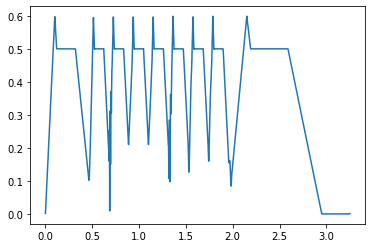

In [88]:
# Smooth the sound by overlapping the notes.

def Scarborough_Fair_ADSR_Overlap():
        
    
    adsr_score = [adsr(music_note) for music_note in SF_score]
    
    overlapped_adsr_score = overlap(adsr_score, 300)
    
    display_envelope(overlapped_adsr_score,-1)

    
    play(overlapped_adsr_score, True)
    

Scarborough_Fair_ADSR_Overlap()






## Discussion

#### Is the application of an ADSR envelope an invertible operation? How might the effects of volume variation be inverted?

The ADSR envelope is invertible. Because the only operation being applied is scaling by different constants at different points in time. Because scaling by a constant can only produce one unique output the ADSR filter must be invertible.

This can be illustrated with a brief example.

This is a graph of the ADSR evnelope:

<img width = 30% height = 30% src="https://github.com/laikas123/Lab2-EE341-/blob/main/adsr1.PNG">

The inverse of which is Inverse ADSR = 1/ADSR:

<img width = 30% height = 30% src="adsr2.png">

If our input x[n] is a sine wave:

<img width = 30% height = 30% src="adsr3.png">

This is a graph of x[n] * ADSR

<img width = 30% height = 30% src="adsr4.png">

This is a graph of x[n] * ADSR * Inverse ADSR:

<img width = 30% height = 30% src="adsr5.png">

It can be seen that applying the ADSR filter then its inverse yields the original input and therefore the system is invertible.

#### What is the effect of the ADSR on the energy of a signal?

Since our signal is finite length we have finite total energy despite the fact that the consituent pieces of our signal are periodic. Because of this it is clear that the ADSR envelope decreases the total energy of the signal. This is because energy is calculated by the sum of every sample of a discrete time signal ranging from n = $- \infty$ to n = $ +\infty$.(In reality it is the absolute value of the signal squared that is summed). Since we have a finite duration signal we have a finite number of samples to include in that sum. Since applying the ADSR envelope multiplies the output values of the signal by values less than 1 this means that each point of the new ADSR filtered signal will have smaller amplitudes at each output point, and therefore when calculating the energy the sum will be lower and means that the ADSR filter reduces the energy of that signal. 

#### Is an envelope function a linear operation?

The ADSR envelope is a linear operation. Because the envelope can be viewed as a single entity, you can view it as a multiplier itself (despite its varying levels of scaling). Linearity requires scaling and addibility to hold. Let's call the ADSR envelope **E**. Then the output can be viewed as x[n] * **E**. If we have two separate inputs a*x1[n] and b*x2[n], then scaling and addibility will hold. For instance ((a*x1[n]) * **E**) +  ((b*x2[n]) * **E**) = (a*x1[n] + b*x2[n])* **E**.

This can also be illustrated with a brief example:

Again this is the ADSR filter:

<img width = 30% height = 30% src="adsr1.png">


This is our input x[n]:

<img width = 30% height = 30% src="adsr3.png">

This is 3*x[n]:

<img width = 30% height = 30% src="adsr6.png">

This is 5*x[n]:

<img width = 30% height = 30% src="adsr7.png">

First we will consider the sum of the output of two separate scaled inputs.

This is 3*x[n]*ADSR:

<img width = 30% height = 30% src="adsr8.png">

This is 5*x[n]*ADSR:


<img width = 30% height = 30% src="adsr9.png">

This is (3*x[n]*ADSR) + (5*x[n]*ADSR):

<img width = 30% height = 30% src="adsr10.png">


Now consider the output when the input is the sum of the two scaled inputs.

This is (3*x[n] + 5*x[n]):

<img width = 30% height = 30% src="adsr11.png">


This is (3*x[n] + 5*x[n])*ADSR:

<img width = 30% height = 30% src="adsr12.png">


Both the graphs for (3*x[n]*ADSR) + (5*x[n]*ADSR) and (3*x[n] + 5*x[n])*ADSR are identical which agrees with our earlier proof. Therefore both scalability and addibility hold for the ADSR filter and therefore it is linear.




# 2) One Dimensional Convolution Sum

In [89]:
# TO DO: define the basic signal generating functions

#unit step function
def u(t_input):
    return 1.0*(t_input>=0)
    
# ramp function
def r(t_input):
    return t_input*(t_input>=0)


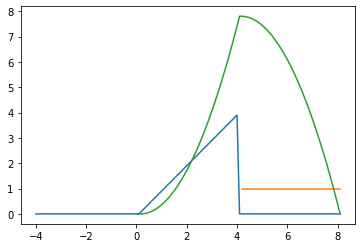

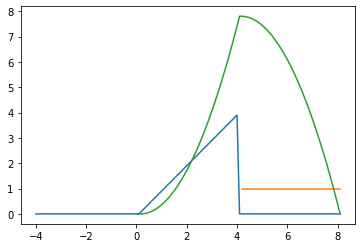

In [90]:
# Use a 4s long ramp sampled at 10 samples/s for the signal
# Use a 4s long step signal for the kernel

end_time=4 # end time in the time interval [0,end_time]
fs=10 # sampling frequency
ts=1/fs #sampling time

# TO DO: create the time vector
tvec = np.arange(0, 4, ts)

# TO DO: define the convolution kernel
kernel = u(tvec)

nKern = len(kernel)

print(nKern)

#handy trick
kflip = kernel[::-1] 

# TO DO: define the signal to be convolved with the kernel
signal1= r(tvec)

# zero-padded data for convolution
#this makes sense since basically it's sliding the kernel across left to right,
#but at first the kernel is so far left that it's not even touching the signal,
#then it touches slides through until it's not touching from the left so this padding ensures
#the vectors are long enough to be multiplied together
signal1 = np.concatenate( (np.zeros(nKern+1),signal1,np.zeros(nKern+1)) ,axis=0)


# n2 = np.arange(0, len(signal1), 1)


#length of padded signal
nSign = len(signal1)

#122 + 40 - 1 
nConv = nSign + nKern - 1

print(nConv)
# initialize convolution output
conv_res = np.zeros(nSign+1)

## convolution in animation
# run convolution
#from 40 to 123
# print(range(nKern, nConv-nKern+2))
for ti in range(nKern,nConv-nKern+2): 
    # get a chunk of data
    print(ti, ti+nKern)
    tempdata = signal1[ti-nKern:ti]/fs
    
    # compute dot product (don't forget to flip the kernel backwards!)
    conv_res[ti] = np.sum(tempdata*kflip)
    
    # draw plot
    pl.cla() # clear the axis
    plt.plot((np.arange(0,nSign)-nKern)/fs,signal1)
    plt.plot((np.arange(ti-nKern,ti)-nKern)/fs,kflip)
    plt.plot((np.arange(nKern,ti)-nKern)/fs,conv_res[nKern:ti])
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time_import.sleep(.01)


# cut off edges
conv_res = conv_res[nKern:-nKern]

## Discussion


- **If you do not normalize your computed convolution sum by dividing by thesampling rate, the magnitude is actually incorrect and does not representthe convolution result.  Why is dividing by sampling rate or multiplyingby sampling time important?  (Hint:  you have done this in EE 235, checkback with the relevant labs and you should find your answer)**

Assuming two reasonable sample rates are applied, the convolution should look the same at the output. So basically because the convolution output at each point is the dot product between two vectors, the sampling rate controls how many products you take total for the dot product, and so dividing by the sampling rate ensures that the same value for the different sampling rates is achieved by normalizing the dot product. 



- **How is the convolution sum different from the convolution integral?**

The convolution integral and convolution sum are very similar. They both flip one of the signals and then slide it over the other while taking a summation that relates to the product of the two signals. In discrete time this product is the dot product of two vectors, whereas in continuous time we simply multiply the two continuous functions and take the integral of the window bounds. The convolution sum is a summation of discrete samples whereas the convolution integral is the area under the curve for a continuous function.

However looking back at our knowledge of what an integral is, the two are also quite similar. Since an integral can also be seen as the summation of rectangles under a curve whose width gets infinitesimal, this is quite similar to the idea of the convolution sum. In a way the convolution integral is like performimg the convolution sum, but using a sampling rate of $\infty$. Therefore the convolution sum and convolution integral are really only different in terms of precision. The convolution integral being the best precision possible, and the convolution sum having precision dependent upon the sampling rate and also the function that is being sampled. For functions that hold a constant value, for example two unit steps, there won't be much difference in precision between the convolution sum and convolution integral. But for more complicated functions, in general, the convolution integral yields higher precision, and the convolution sum will have precision dependent upon the sampling rate.